# Working with DeepMIMO Scenarios
**NeoRadium**’s [DeepMimoData](https://interdigitalinc.github.io/NeoRadium/html/source/API/DeepMIMO.html#neoradium.deepmimo.DeepMimoData) class can be used with [DeepMIMO](https://www.deepmimo.net) scenarios to generate trajectories of user movements within a ray-tracing environment. By employing the [TrjChannel](https://interdigitalinc.github.io/NeoRadium/html/source/API/Channels.html#neoradium.trajchannel.TrjChannel) class, designed as a trajectory-based channel model, you can construct sequences of channels that adhere to temporal and spatial consistency, based on the provided trajectory.

This notebook shows how to:
* Use the [DeepMimoData](https://interdigitalinc.github.io/NeoRadium/html/source/API/DeepMIMO.html#neoradium.deepmimo.DeepMimoData) class to open a [DeepMIMO](https://www.deepmimo.net) scenario
* Use its visialization method to draw the scenario map
* Create randomly generated trajectories
* Create your own trajectories interactively on the scenario map
* Draw the generated trajectory on the map




In [1]:
import numpy as np
import os, time
import scipy
import matplotlib.pyplot as plt

from neoradium import DeepMimoData, Carrier, random

In [2]:
# Replace this with the folder on your computer where you store DeepMIMO scenarios
dataFolder = "/data/RayTracing/DeepMIMO/Scenarios/V4/"
DeepMimoData.setScenariosPath(dataFolder)

# Get information about a scenario:
DeepMimoData.showScenarioInfo("asu_campus_3p5")

Scenario:          asu_campus_3p5
File Version:      4.0.0a3
Carrier Frequency: 3.5 GHz
Data Folder:       /Users/shahab/data/RayTracing/DeepMIMO/Scenarios/V4/asu_campus_3p5/

UE Grids: (1)
  rx_grid: ID:0, Num UEs:131,931, xRange:-225.55..184.45, yRange:-160.17..159.83

Base Stations: (1)
  BS: ID:1, Position:(166.00,104.00,22.00)


In [3]:
# Using the above information we create a DeepMimoData object for user grid 0 and base station 1:
deepMimoData = DeepMimoData("asu_campus_3p5", baseStationId=1, gridId=0)
deepMimoData.print()



DeepMimoData Properties:
  Scenario:                   asu_campus_3p5
  Version:                    4.0.0a3
  UE Grid:                    rx_grid
  Grid Size:                  411 x 321
  Base Station:               BS (at [166. 104.  22.])
  Total Grid Points:          131,931
  UE Spacing:                 [1. 1.]
  UE bounds (xyMin, xyMax)    [-225.55 -160.17], [184.45 159.83]
  UE Height:                  1.50
  Carrier Frequency:          3.5 GHz
  Num. paths (Min, Avg, Max): 0, 6.21, 10
  Num. total blockage:        46774
  LOS percentage:             19.71%



(<Figure size 742.518x471.734 with 1 Axes>,
 <Axes: title={'center': 'Map of LOS/NLOS paths'}, xlabel='X', ylabel='Y'>)

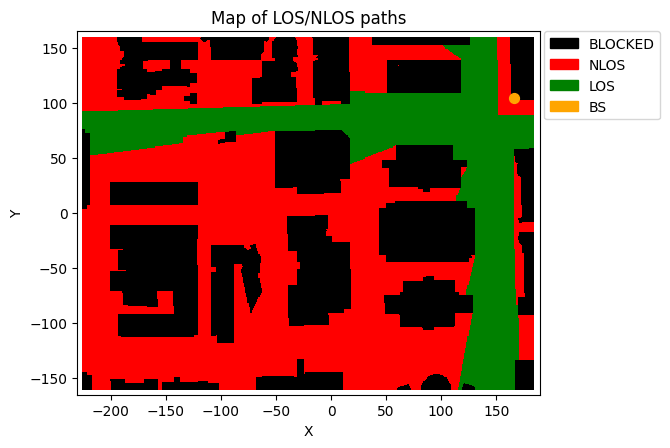

In [4]:
# Draw a map of the scenario showing the Line-Of-Sight (LOS) vs Non-Line-Of-Sight (NLOS) communication
# between the UEs and the base station.
deepMimoData.drawMap("LOS-NLOS")  # Also try "1stPathDelays" or "1stPathPowers"


## Creating Random Trajectory


Trajectory Properties:
  start (x,y,z):         (-164.55, 39.83, 1.50)
  No. of points:         203482
  curIdx:                0 (0.00%)
  curSpeed:              [0.85 0.85 0.  ]
  Total distance:        244.15 meters
  Total time:            203.481 seconds
  Average Speed:         1.200 mps
  Carrier Frequency:     3.5 GHz
  Paths (Min, Avg, Max): 3, 8.87, 10
  Totally blocked:       0
  LOS percentage:        27.38%



(<Figure size 742.518x471.734 with 1 Axes>,
 <Axes: title={'center': 'Map of LOS/NLOS paths'}, xlabel='X', ylabel='Y'>)

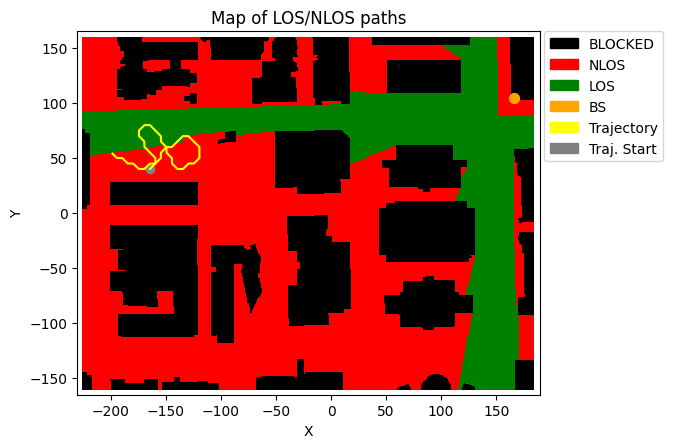

In [5]:
# Now let's create a random trajectory:
random.setSeed(1234)     # Remark this out if you want new random trajectories on each run.

# The points on a trajectory are determined by the timing of slots within 3GPP subframes, which are 
# governed by a specific numerology. The “getRandomTrajectory” function utilizes a BandwidthPart object 
# to extract the necessary timing information. Therefore, let’s first create the Carrier and BandwidthPart
# objects.
carrier = Carrier(startRb=0, numRbs=25, spacing=15) # Carrier with 25 Resource Blocks, 15KHz subcarrier spacing
bwp = carrier.curBwp                                # The only bandwidth part in the carrier

# We need to specify the bounding box of the trajectory. Here we select a wide area
# from the map that has both LOS and NLOS points:
xyBounds = np.array([[-210, 40], [-120, 100]])    # [[minX, minY], [maxX, maxY]]
segLen = 5                                        # The number of grid points on the shortest segment

trajectory = deepMimoData.getRandomTrajectory(xyBounds, segLen, bwp,
                                              trajLen=200,            # Number of grid points on trajectory
                                              speedMps=1.2)           # Speed in mps (Walking)
# Print the trajectory information:
trajectory.print()

# Draw the Map with the trajectory:
deepMimoData.drawMap("LOS-NLOS", trajectory)


## Interactively trajectory generation

In [6]:
# You can also define your own trajectory interactively by selecting points on the map. The function
# “interactiveTrajPoints” can be used to obtain a list of points on the map representing the trajectory. 
# This function opens a new window displaying the current scenario’s map, and you can click on the points
# of the trajectory one by one. Use left-click to select new points and right-click to undo last point.
points = deepMimoData.interactiveTrajPoints(mapType="LOS-NLOS")
print("Selected Points:\n",points)


Running the interactive map for 'asu_campus_3p5'...
Done. 32 points selected.
Selected Points:
 [[-2.08244352e+02 -1.02666732e+02]
 [-2.13703861e+02 -2.53236924e+01]
 [-2.09154271e+02  1.97172539e+01]
 [-2.00055090e+02  4.24652066e+01]
 [-1.80036891e+02  5.88437325e+01]
 [-1.43185208e+02  7.38573813e+01]
 [-1.04058729e+02  8.20466442e+01]
 [-5.49231514e+01  8.38664805e+01]
 [ 1.26894117e-01  8.43214395e+01]
 [ 5.83616530e+01  8.20466442e+01]
 [ 1.07042272e+02  7.43123403e+01]
 [ 1.46623709e+02  5.61139782e+01]
 [ 1.60272481e+02  2.29019673e+01]
 [ 1.62092317e+02 -1.25848389e+01]
 [ 1.56632809e+02 -5.30761947e+01]
 [ 1.45713791e+02 -9.22026733e+01]
 [ 1.17961289e+02 -1.23594848e+02]
 [ 8.11096057e+01 -1.34058906e+02]
 [ 4.47128814e+01 -1.33603947e+02]
 [-1.35218775e+01 -1.27234520e+02]
 [-6.17475372e+01 -1.04031609e+02]
 [-6.44772915e+01 -9.12927552e+01]
 [-5.40132333e+01 -5.80807443e+01]
 [-5.12834789e+01 -3.39679144e+01]
 [-6.26574553e+01 -1.48596342e+01]
 [-6.58421687e+01  5.61352322


Trajectory Properties:
  start:                       -208.55  -102.17    1.50
  No. of points:               89407
  curIdx:                      0 (0.00%)
  curSpeed:                    [ 0.   14.08  0.  ]
  Total distance:              1257.01 meters
  Total time:                  89.406 seconds
  Average Speed:               14.060 mps
  Carrier Frequency:           3.5 GHz
  Num. paths (Min, Avg, Max):  3, 9.10, 10
  Num. totally blocked points: 0
  LOS percentage:              43.25%



(<Figure size 742.518x471.734 with 1 Axes>,
 <Axes: title={'center': 'Map of LOS/NLOS paths'}, xlabel='X', ylabel='Y'>)

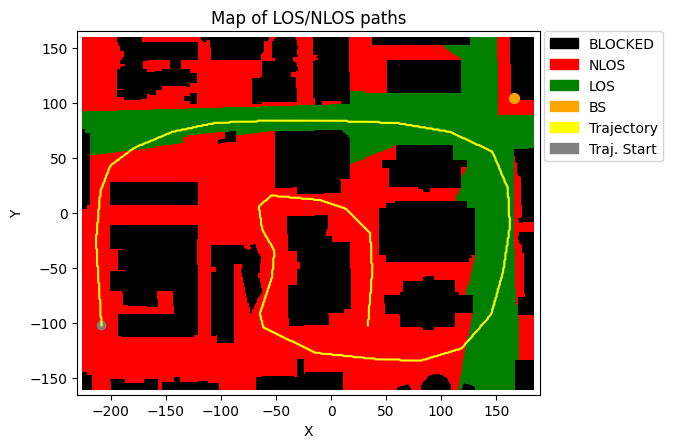

In [7]:
# Now create a trajectory using the selected points:
trajectory = deepMimoData.trajectoryFromPoints(points, bwp, speedMps=14)

# Print the trajectory information:
trajectory.print()

# Draw the Map with the trajectory:
deepMimoData.drawMap("LOS-NLOS", trajectory)
